# Time domain analysis

In [67]:
import numpy as np
from scipy import stats
import statsmodels.stats.multitest as smt
west = np.load('sub_all_time_west.npy')
east = np.load('sub_all_time_east.npy')
img = np.load('sub_all_time_imagery.npy')*100
west = np.mean(west, axis=2)*100
east = np.mean(east, axis=2)*100
ser_west = np.std(west, axis=0)/np.sqrt(17)
ser_east = np.std(east, axis=0)/np.sqrt(17)
pvals_east = stats.ttest_1samp(east,50,axis=0)[1]
pvals_west = stats.ttest_1samp(west,50,axis=0)[1]
# pvals_east = smt.multipletests(pvals_east,0.1,'fdr_bh')
# pvals_west = smt.multipletests(pvals_west,0.1,'fdr_bh')
ser_img = np.std(np.mean(img, axis=2), axis=0)/np.sqrt(17)
#pvals_prc = stats.ttest_rel(east,west)[1]
pvals_img = stats.ttest_1samp(np.mean(img,2),50,axis=0)[1]
#pvals_prc = smt.multipletests(pvals_prc,0.1,'fdr_bh')
#pvals_img = smt.multipletests(pvals_img,0.1,'fdr_bh')

In [54]:
sig_img

array([49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

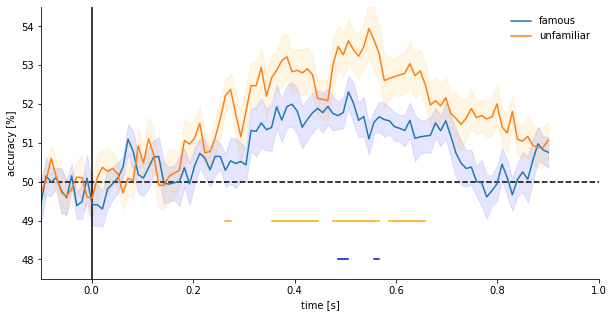

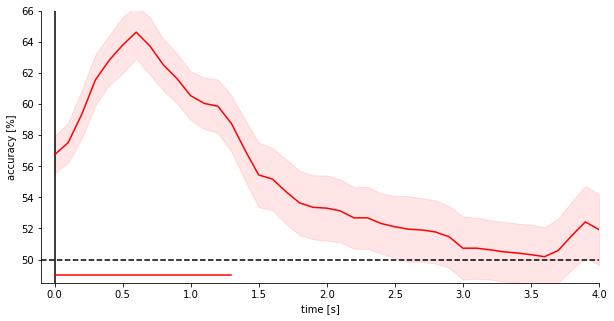

In [68]:
import matplotlib.pyplot as plt
time_prc = np.linspace(-0.1,0.9,100)
time_img = np.linspace(0,4,41)
crit = 0.001

'''
sig_west = pvals_west[0]*1.
sig_west[sig_west==0]=np.nan
sig_west = sig_west*48

sig_east = pvals_east[0]*1.
sig_east[sig_east==0]=np.nan
sig_east = sig_east*49

sig_img = pvals_img[0]*1.
sig_img[sig_img==0]=np.nan
sig_img = sig_img*49
'''
sig_west = (pvals_west<crit)*1.
sig_west[sig_west==0]=np.nan
sig_west = sig_west*48

sig_east = (pvals_east<crit)*1.
sig_east[sig_east==0]=np.nan
sig_east = sig_east*49

sig_img = (pvals_img<crit)*1.
sig_img[sig_img==0]=np.nan
sig_img = sig_img*49



fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,1,1)
ax1.plot(time_prc,np.mean(west, axis=0),label='famous')
ax1.plot(time_prc,np.mean(east, axis=0),label='unfamiliar')
ax1.fill_between(time_prc, (np.mean(west, axis=0)-ser_west), (np.mean(west, axis=0)+ser_west), color='b', alpha=.1)
ax1.fill_between(time_prc, (np.mean(east, axis=0)-ser_east), (np.mean(east, axis=0)+ser_east), color='orange', alpha=.1)
ax1.plot(time_prc,sig_east, c='orange')
ax1.plot(time_prc,sig_west, c='b')
plt.vlines(0,0,100)
plt.ylim(47,54)
plt.hlines(50,-0.1,1, linestyles='dashed')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xlabel('time [s]')
plt.ylim(47.5,54.5)
plt.xlim(-0.1,1)
plt.ylabel('accuracy [%]')
#plt.text(-0.17,54.5,'a', fontsize = 20)
ax1.legend(frameon=False)
plt.savefig('time_domain_perception.png', dpi = 300)

fig = plt.figure(figsize=(10,5))
ax2 = plt.subplot(1,1,1)
ax2.plot(time_img, np.mean(np.mean(img, axis=2), axis=0), c = 'red')
ax2.fill_between(time_img, (np.mean(np.mean(img, axis=2), axis=0)-ser_img), (np.mean(np.mean(img, axis=2), axis=0)+ser_img), color='red', alpha=.1)
ax2.plot(time_img,sig_img, c='red')
plt.vlines(0,0,100)
plt.hlines(50,-0.1,4, linestyles='dashed')
plt.ylim(48.5,66)
plt.xlim(-0.1,4)
plt.tick_params(axis='y', which='minor', labelsize=8)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.xlabel('time [s]')
plt.ylabel('accuracy [%]')
#plt.text(-0.4,66,'b', fontsize = 20)
plt.savefig('time_domain_imagery.png', dpi = 300)

# Averages of discrimination

In [59]:
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
from scipy.spatial.distance import squareform
import numpy as np

infolder, outfolder = find_folder()
data_prc = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data_img = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data_prc, data_img = np.array(data_prc), np.array(data_img)
data_prc_east_up = np.array([np.mean(squareform(x[:25,:25]), axis=0) for x in np.rollaxis(data_prc, 0)])
data_prc_west_up = np.array([np.mean(squareform(x[25:50,25:50]), axis=0) for x in np.rollaxis(data_prc, 0)])
data_prc_east_inv = np.array([np.mean(squareform(x[50:75,50:75]), axis=0) for x in np.rollaxis(data_prc, 0)])
data_prc_west_inv = np.array([np.mean(squareform(x[75:,75:]), axis=0) for x in np.rollaxis(data_prc, 0)])

data_prc_5_up = np.array([np.mean(squareform(isolate_perc_5(x[:50,:50]))) for x in np.rollaxis(data_prc, 0)])
data_img_5 = np.array([np.mean(squareform(data_img[i,j,:,:])) for j in range(17) for i in range(6)])
data_img_5 = np.reshape(data_img_5,(6,17),order='F')

In [60]:
pvals_west = stats.ttest_1samp(data_prc_east_up*100,50,axis=0)[1]
pvals_west

9.270030744473173e-06

In [61]:
av_east_up = np.mean(data_prc_east_up)
av_west_up = np.mean(data_prc_west_up)
av_east_inv = np.mean(data_prc_east_inv)
av_west_inv = np.mean(data_prc_west_inv)
av_prc_5_up = np.mean(data_prc_5_up)
av_img_5 = np.mean(data_img_5, axis=1)

std_east_up = np.std(data_prc_east_up)/np.sqrt(17)
std_west_up = np.std(data_prc_west_up)/np.sqrt(17)
std_east_inv = np.std(data_prc_east_inv)/np.sqrt(17)
std_west_inv = np.std(data_prc_west_inv)/np.sqrt(17)
std_prc_5_up = np.std(data_prc_5_up)/np.sqrt(17)
std_img_5 = np.std(data_img_5, axis=1)/np.sqrt(17)

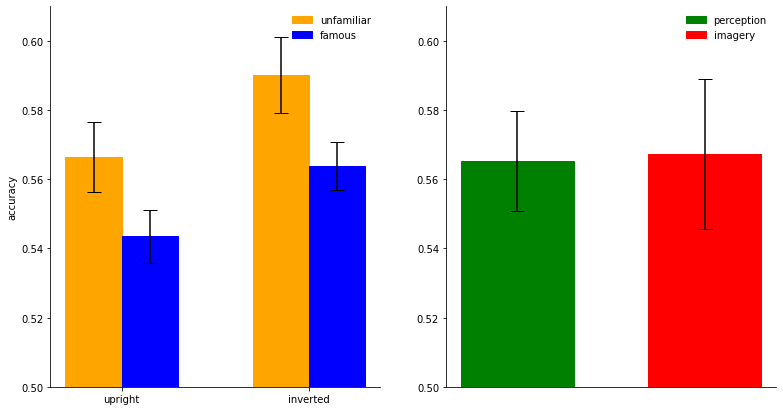

In [62]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [av_east_up, av_east_inv]
 
# Choose the height of the cyan bars
bars2 = [av_west_up, av_west_inv]
 
# Choose the height of the error bars (bars1)
yer1 = [std_east_up, std_east_inv]
 
# Choose the height of the error bars (bars2)
yer2 = [std_west_up, std_west_inv]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 

fig = plt.figure(figsize=(13,7))
ax1 = plt.subplot(1,2,1)
# Create blue bars
ax1.bar(r1, bars1, width = barWidth, color = 'orange', edgecolor = 'orange', yerr=yer1, capsize=7, label='unfamiliar')
 
# Create cyan bars
ax1.bar(r2, bars2, width = barWidth, color = 'blue', edgecolor = 'blue', yerr=yer2, capsize=7, label='famous')
 
# general layout
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['upright', 'inverted'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.ylim(0.5,0.61)
plt.ylabel('accuracy')
plt.legend(frameon=False)

ax2 = plt.subplot(1,2,2)
# Create blue bars
ax2.bar(0, av_prc_5_up, width = barWidth, color = 'green', edgecolor = 'green', yerr=std_prc_5_up, capsize=7, label='perception')
ax2.bar(0.5, av_img_5[5], width = barWidth, color = 'red', edgecolor = 'red', yerr=std_img_5[5], capsize=7, label='imagery')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.legend(frameon=False)
plt.ylim(0.5,0.61)
plt.xticks([], [])
# Show graphic
plt.savefig('averages_with_inverted.png', dpi =300)

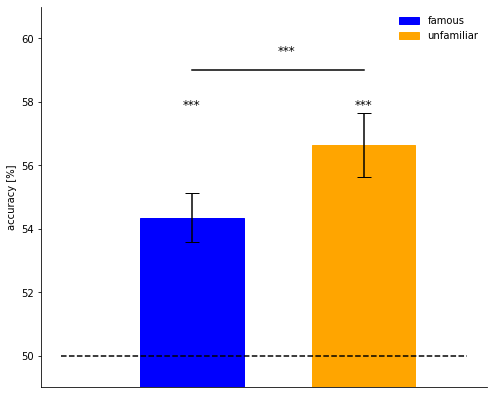

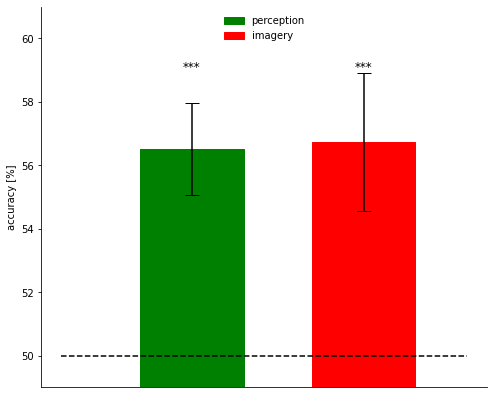

In [65]:
fig = plt.figure(figsize=(8,7))
ax1 = plt.subplot(1,1,1)
# Create blue bars

ax1.bar(0, av_west_up*100, width = 0.3, color = 'blue', edgecolor = 'blue', yerr=std_west_up*100, capsize=7, label='famous')
ax1.bar(0.5, av_east_up*100, width = 0.3, color = 'orange', edgecolor = 'orange', yerr=std_east_up*100, capsize=7, label='unfamiliar')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.legend(frameon=False)
plt.ylim(49,61)
plt.plot([0,0.5], [59, 59], c='k')
plt.text(0.25, 59.5, '***', fontsize=12)
plt.text(0, 57.8, '***', fontsize=12, horizontalalignment='center')
plt.text(0.5, 57.8, '***', fontsize=12, horizontalalignment='center')
plt.ylabel('accuracy [%]')
plt.hlines(50,-0.38,0.8, linestyles='dashed')
#plt.text(-0.4,60,'a', fontsize = 20)
plt.xticks([], [])
# Show graphic
plt.savefig('averages_perception.png', dpi = 300)


fig = plt.figure(figsize=(8,7))
ax2 = plt.subplot(1,1,1)
# Create blue bars
ax2.bar(0, av_prc_5_up*100, width = 0.3, color = 'green', edgecolor = 'green', yerr=std_prc_5_up*100, capsize=7, label='perception')
ax2.bar(0.5, av_img_5[5]*100, width = 0.3, color = 'red', edgecolor = 'red', yerr=std_img_5[5]*100, capsize=7, label='imagery')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.legend(frameon=False, loc = 'upper center')
plt.ylim(49,61)
plt.xticks([], [])
plt.text(0, 59, '***', fontsize=12, horizontalalignment='center')
plt.text(0.5, 59, '***', fontsize=12, horizontalalignment='center')
#plt.text(-0.4,60,'b', fontsize = 20)
plt.hlines(50,-0.38,0.8, linestyles='dashed')
plt.ylabel('accuracy [%]')
# Show graphic
plt.savefig('averages_all.png', dpi = 300)

# Face Space

0.2921145258253691
0.26363117940366576
0.31181314665166937
0.2850727645210108
0.2582838907530256
0.08915372835579405


C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


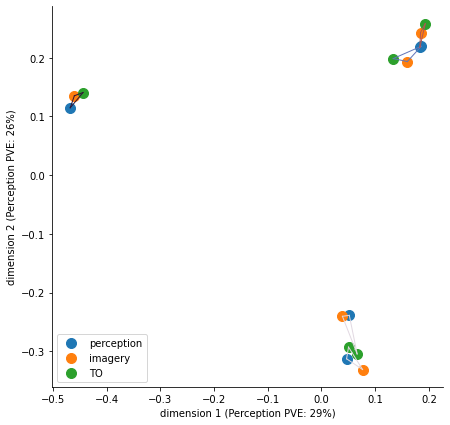

In [12]:
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import procrustes as procr
import pandas as pd
from scipy.spatial.distance import squareform, pdist

infolder, outfolder = find_folder()
data_prc = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data_img = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data_prc, data_img = np.array(data_prc)[:,:50,:50], np.array(data_img)[5,:,:,:]

data_prc_5_up = np.array([isolate_perc_5(x) for x in np.rollaxis(data_prc, 0)])
av_prc_5_up = np.mean(data_prc_5_up, axis=0)
av_img = np.mean(data_img, axis=0)
sp_prc_5_up = cmdscale(av_prc_5_up)
print(np.sum(sp_prc_5_up[1][0])/np.sum(sp_prc_5_up[1]))
print(np.sum(sp_prc_5_up[1][1])/np.sum(sp_prc_5_up[1]))
sp_prc_5_up = sp_prc_5_up[0]
sp_img = cmdscale(av_img)
print(np.sum(sp_img[1][0])/np.sum(sp_img[1]))
print(np.sum(sp_img[1][1])/np.sum(sp_img[1]))
sp_img = sp_img[0]


stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
dist = pd.DataFrame(squareform(pdist(stims.T)),columns=stims.columns,index=stims.columns)
ims_names, prc_names, _ = import_names()
dist_imag = dist.loc[ims_names,ims_names]
dist_imag = dist_imag.values
dist_imag = cmdscale(dist_imag)[0]
print(np.sum(dist_imag[1][0])/np.sum(dist_imag[1]))
print(np.sum(np.abs(dist_imag[1][1]))/np.sum(np.abs(dist_imag[1])))



prc, img, d = procr(sp_prc_5_up[:,:4], sp_img[:,:4])
prc, to, d = procr(sp_prc_5_up[:,:4], dist_imag[:,:4])
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
plt.scatter(prc[:,0],prc[:,1], s=100, label = 'perception')
plt.scatter(img[:,0],img[:,1], s=100, label = 'imagery')
plt.scatter(to[:,0],to[:,1], s=100, label = 'TO')
plt.xlabel('dimension 1 (Perception PVE: 29%)')
plt.ylabel('dimension 2 (Perception PVE: 26%)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc='lower left')



colors = plt.cm.twilight(np.linspace(0,1,5))
for i in range(5):
    width = 1
    plt.plot([prc[i,0],img[i,0]],[prc[i,1],img[i,1]], c='k', linewidth = width, color = colors[i])
    plt.plot([prc[i,0],to[i,0]],[prc[i,1],to[i,1]], c='k', linewidth = width, color = colors[i])
    plt.plot([to[i,0],img[i,0]],[to[i,1],img[i,1]], c='k', linewidth = width, color = colors[i])
plt.savefig('face_space.png', dpi = 300)


# Plotting coefficents

In [22]:
np.abs(imag)

array([1.18564269e-05, 2.01297628e-05, 1.04655077e-05, 3.52046987e-05,
       2.74502962e-05, 2.71117675e-06, 8.62251662e-05, 5.82304582e-05,
       5.67034202e-05, 4.41081803e-05, 2.39071997e-06, 8.48778628e-06,
       1.38061033e-05, 3.70881837e-05, 1.39190053e-05, 2.37158282e-06,
       3.68215217e-05, 2.35067670e-05, 6.17921832e-05, 3.39625294e-05,
       5.17963240e-05, 3.25477904e-06, 1.11433981e-05, 4.83272321e-05,
       3.51116628e-06, 7.10195724e-05, 2.03744562e-05, 2.60573778e-05,
       8.00979637e-06, 4.69955904e-05, 1.08525739e-05, 2.26610763e-05,
       1.96017231e-05, 2.72339511e-05, 3.59491844e-05, 9.94150720e-06,
       1.94459583e-05, 2.18248731e-05, 2.60173878e-05, 3.64166995e-06,
       1.45055463e-05, 7.19498670e-06, 1.26213673e-06, 2.65392442e-06,
       1.17978604e-05, 2.95241757e-05, 1.92781041e-05, 3.16928473e-05,
       1.65017308e-05, 1.70255761e-06, 4.44988080e-05, 2.65297465e-05,
       2.20997991e-05, 1.00272044e-05, 2.14635811e-05, 3.53501225e-06,
      

Reading E:\Ilya_study\Analysis\S04_perc_aver-epo.fif ...
    Found the data of interest:
        t =    -101.56 ...     996.09 ms
        0 CTF compensation matrices available
1200 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


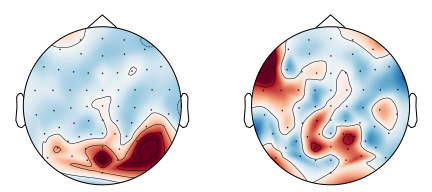

In [36]:
import mne
from pathlib import Path, PurePath
import numpy as np
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
import matplotlib.pyplot as plt

infolder, outfolder = find_folder()


j=4
fname = PurePath(outfolder,'S'+str(j).zfill(2)+'_perc_aver-epo.fif')
epochs = mne.read_epochs(fname)
imag = load_pkl('E:\Ilya_study\Analysis\Old','svm_imag_coefs.pkl')
perc = load_pkl('E:\Ilya_study\Analysis\Old','svm_perc_coefs.pkl')
imag = np.array(imag)
perc = np.array(perc)
perc = np.mean(perc, axis=(0,1,2))
imag = np.mean(imag, axis=(0,1,2))
imag = np.abs(imag)
perc = np.abs(perc)
#imag = imag-np.mean(imag)
#perc = perc-np.mean(perc)
fig, ax = plt.subplots(figsize=(7.5, 10),nrows=1,ncols=2)
mne.viz.plot_topomap(perc,epochs.info, vmin=-0.00005, vmax=0.00005, axes=ax[0], show=False)
a = mne.viz.plot_topomap(imag,epochs.info, vmin=-0.00005, vmax=0.00005, axes=ax[1], show=False)
#fig.colorbar(a[0], ax=ax[2])
plt.savefig('coefs.png', dpi=300)
#plt.show()

In [51]:
mne.viz.plot_topomap(imag,epochs.info,vmin=np.min(perc),axes=ax[1], show=True)
plt.show()

<Figure size 432x288 with 0 Axes>

[[   0.         5487.0585016  6230.08884367 6328.46434769 5303.31028698]
 [5487.0585016     0.         4853.06995622 4520.60925097 4715.13276589]
 [6230.08884367 4853.06995622    0.         5693.66384677 5463.59323156]
 [6328.46434769 4520.60925097 5693.66384677    0.         5391.60838711]
 [5303.31028698 4715.13276589 5463.59323156 5391.60838711    0.        ]]
(5, 4)
0.2921145258253691
0.26363117940366576
[[0.         0.52205882 0.56862745 0.58823529 0.52941176]
 [0.52205882 0.         0.55882353 0.53431373 0.54166667]
 [0.56862745 0.55882353 0.         0.60294118 0.62990196]
 [0.58823529 0.53431373 0.60294118 0.         0.59803922]
 [0.52941176 0.54166667 0.62990196 0.59803922 0.        ]]
0.31181314665166937
0.2850727645210108
(5, 5)


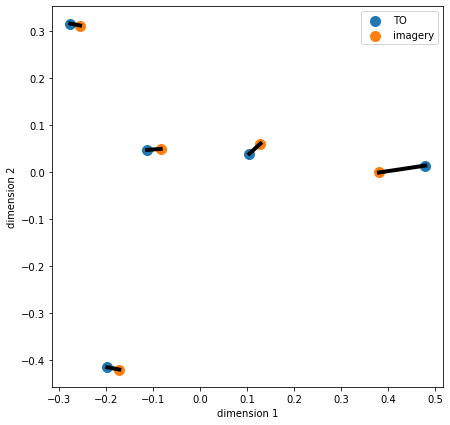

In [20]:
import pandas as pd
from scipy.spatial.distance import squareform, pdist
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb

stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
dist = pd.DataFrame(squareform(pdist(stims.T)),columns=stims.columns,index=stims.columns)
ims_names, prc_names, _ = import_names()
dist_imag = dist.loc[ims_names,ims_names]
dist_imag = dist_imag.values
print(dist_imag)
dist_imag = cmdscale(dist_imag)[0]
print(dist_imag.shape)
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import procrustes as procr

infolder, outfolder = find_folder()
data_prc = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data_img = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data_prc, data_img = np.array(data_prc)[:,:50,:50], np.array(data_img)[5,:,:,:]

data_prc_5_up = np.array([isolate_perc_5(x) for x in np.rollaxis(data_prc, 0)])
av_prc_5_up = np.mean(data_prc_5_up, axis=0)
av_img = np.mean(data_img, axis=0)
sp_prc_5_up = cmdscale(av_prc_5_up)
print(np.sum(sp_prc_5_up[1][0])/np.sum(sp_prc_5_up[1]))
print(np.sum(sp_prc_5_up[1][1])/np.sum(sp_prc_5_up[1]))
sp_prc_5_up = sp_prc_5_up[0]
print(av_img)
sp_img = cmdscale(av_img)
print(np.sum(sp_img[1][0])/np.sum(sp_img[1]))
print(np.sum(sp_img[1][1])/np.sum(sp_img[1]))
sp_img = sp_img[0]
print(sp_img.shape)
dist_imag, img, d = procr(dist_imag[:,:4], sp_img[:,:4])
fig = plt.figure(figsize=(7,7))
plt.scatter(dist_imag[:,0],dist_imag[:,1], s=100, label = 'TO')
plt.scatter(img[:,0],img[:,1], s=100, label = 'imagery')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.legend()
for i in range(5):
    width = (distance.euclidean(dist_imag[i,:],img[i,:])*2+1)**20
    width = 4
    plt.plot([dist_imag[i,0],img[i,0]],[dist_imag[i,1],img[i,1]], c='k', linewidth = width)
plt.savefig('face_space_TO.png', dpi = 300)

In [20]:
import pickle
import numpy as np
from sklearn import manifold
from scipy.spatial import procrustes as procr
import pandas as pd
from scipy.spatial.distance import squareform, pdist
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb

infolder, outfolder = find_folder()

data_prc = load_pkl(outfolder,'svm_prc_accuracy.pkl')


data_prc = np.array(data_prc)
data_prc = np.mean(data_prc[:,25:50,25:50],axis = 0)
print(data_prc.shape) #25 X 25

stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
dist = pd.DataFrame(squareform(pdist(stims.T)),columns=stims.columns,index=stims.columns)
ims_names, prc_names, _ = import_names()
dist_imag = dist.loc[ims_names,ims_names]
dist_imag = (dist_imag+np.min(dist_imag))/np.max(dist_imag)
dist_imag = cmdscale(dist_imag)[0]
print(dist_imag)

out = []
for j in range(10000):
    idx = np.random.permutation(data_prc.shape[0])[:5]
    temp = data_prc[np.ix_(idx,idx)]
    temp = cmdscale(temp)[0]
    _,_,d = procr(temp[:5,:4],dist_imag[:5,:4])
    out.append(d)

perms = np.array(out)

from scipy.stats import percentileofscore
data_prc = load_pkl(outfolder,'svm_prc_accuracy.pkl')
data_prc = np.array(data_prc)
data_prc = np.mean(data_prc[:,:50,:50],axis = 0)
data_prc_5 = isolate_perc_5(data_prc)
data_prc_5 = cmdscale(data_prc_5)[0]
print(data_prc_5)
_,_,d = procr(data_prc_5[:5,:4],dist_imag[:5,:4])
percentileofscore(perms,d)

(25, 25)
[[ 0.55598835 -0.06807956 -0.29881989 -0.04088411  0.03182134]
 [-0.20637027  0.08276149 -0.11404021  0.43257321  0.03070496]
 [-0.23591643 -0.52191     0.08816622 -0.09781776  0.03170149]
 [-0.33129463  0.32264948 -0.18164625 -0.27327839  0.03158393]
 [ 0.206452    0.18743267  0.50000629 -0.00780394  0.0319047 ]]
[[ 4.15130263e-02 -1.91072233e-01  2.74730894e-01  1.04135116e-01
  -1.18849432e-09]
 [ 1.48718907e-01  1.75591786e-01  8.87217908e-02 -2.41791864e-01
  -1.18849432e-09]
 [-3.74353710e-01  9.17112361e-02 -5.85099580e-03 -3.12826538e-03
  -1.18849432e-09]
 [ 1.46665343e-01  1.74032900e-01 -1.22658276e-01  2.30674181e-01
  -1.18849432e-09]
 [ 3.74564339e-02 -2.50263690e-01 -2.34943413e-01 -8.98891671e-02
  -1.18849432e-09]]


3.21

In [18]:
d

0.010761505175538665

In [19]:
perms

array([0.03692949, 0.03710044, 0.01773829, ..., 0.02125624, 0.03589798,
       0.01986748])

In [6]:
print(sum(fc_prc[1][:2])/sum(fc_prc[1]))
print(sum(fc_img[1][:2])/sum(fc_img[1]))

0.12456638267448342
0.5968859111726802


In [48]:
import seaborn as sns
ax = sns.barplot(x="day", y="tip", data=[data_prc_east_up,], capsize=.2)

AttributeError: 'list' object has no attribute 'get'

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(time_prc,np.mean(west, axis=0),label='famous')
ax1.plot(time_prc,np.mean(east, axis=0),label='unfamiliar')
plt.vlines(0,0,1)
plt.ylim(0.49,0.54)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xlabel('time [s]')
ax1.legend(frameon=False)

ax2 = plt.subplot(2,1,2)
ax2.plot(time_img, np.mean(np.mean(img, axis=2), axis=0))
ax2.plot(time_img,sig_img, c='red')
plt.vlines(0,0,1)
plt.ylim(0.485,0.67)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.xlabel('time [s]')
plt.show()

In [49]:
x = arange(0.,10.1,0.2)
a = sin(x)
b = cos(x)
fig1 = plt.figure(figsize = (8,8))
plt.subplots_adjust(hspace=0.4)
p1 = plt.subplot(2,1,1)
l1 = plt.plot(x,a)
lx = plt.xlabel("x (km)")
ly = plt.ylabel("y (m)")
ttl = plt.title("sine")
p2 = plt.subplot(2,1,2)
l2 = plt.plot(x,b)
lx = plt.xlabel("x (km)")
ly = plt.ylabel("y (m)")
ttl = plt.title("cosine")
sttl = plt.suptitle("two plots")
plt.show()

(16, 100)

In [ ]:
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
import os.path as op
from scipy.spatial.distance import pdist, squareform
import mne
infolder, outfolder = find_folder()
subs = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
data=list()
labels = list()
trials=8
tbins = np.arange(-0.1,4,0.1)
results_east=[]
results_west=[]
for j in subs:
    print(j)
    fname = op.join(outfolder,f'S{j:02}_imag-epo.fif')
    epochs = mne.read_epochs(fname)
    #trials = len(epochs['101']) # average all trials.
    blocks=12
    print(blocks)
    eps = block_average(epochs, trials, blocks, kind='imag')
    results_s=[]
    for i in tbins:
        times=(i,i+1)
        X, Y = convert_epochs_to_2D_array(eps, times=times)
        confusion, duration = run_eeg_svm(X, Y, blocks)
        results_s.append(squareform(confusion))
    results.append(results_s)

In [39]:
img.shape

(16, 41, 10)

In [35]:
results = np.array(results)

In [31]:
a = np.mean(np.mean(results, axis=2), axis=0)
a.shape
b = np.linspace(-0.1,4,41)
b.shape

(41,)

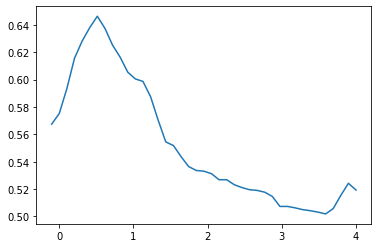

In [32]:
import matplotlib.pyplot as plt
plt.plot(b,a)
plt.show()

In [33]:
np.save('sub_all_time_imagery.npy', results)